In [13]:

pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Sepideh\Desktop\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [22]:
#libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sepideh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sepideh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
f = open('asv.txt', encoding="ISO-8859-1")
raw = f.read()
findWordsText = nltk.word_tokenize(raw)
text = nltk.Text(findWordsText)

In [6]:
len(text)

953370

In [7]:
text.count("Christ")

530

In [8]:
text.concordance("God")

Displaying 25 of 4106 matches:
 Genesis Chapter 1 1 In the beginning God created the heavens and the earth . 2
 face of the deep : and the Spirit of God moved upon the face of the waters . 3
d upon the face of the waters . 3 And God said , Let there be light : and there
e light : and there was light . 4 And God saw the light , that it was good : an
aw the light , that it was good : and God divided the light from the darkness .
d the light from the darkness . 5 And God called the light Day , and the darkne
d there was morning , one day . 6 And God said , Let there be a firmament in th
de the waters from the waters . 7 And God made the firmament , and divided the 
the firmament : and it was so . 8 And God called the firmament Heaven . And the
re was morning , a second day . 9 And God said , Let the waters under the heave
 land appear : and it was so . 10 And God called the dry land Earth ; and the g
er of the waters called he Seas : and God saw that it was good . 11 And God sai
and God s

In [9]:
text.count("pray")

305

In [10]:
text.similar("Christ")

god him it israel jehovah them you me man thee jerusalem and heaven
death the righteousness men truth egypt judah


In [11]:
text.common_contexts(["Jesus", "Christ"])


of_and lord_and with_and for_sake of_the where_was of_but of_may
to_but as_was is_the of_was in_the up_whom of_that in_that lord_for
that_died of_i of_chapter


<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

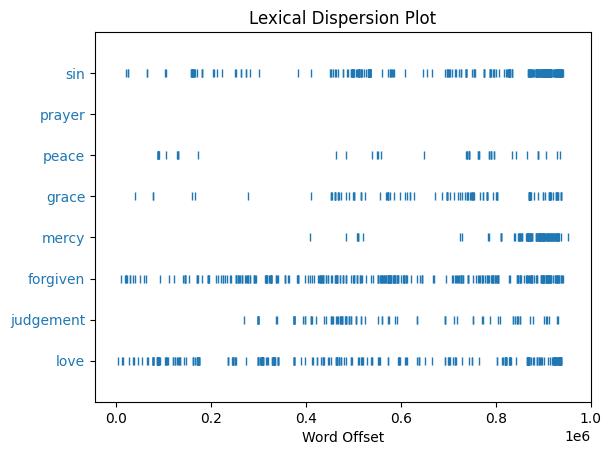

In [49]:
nltk.draw.dispersion_plot(text,["love","judgement", "forgiven", "mercy", "grace", "peace", "prayer", "sin" ])

In [15]:
frequency_dist = nltk.FreqDist(text)
frequency_dist.most_common(25)

[(',', 70462),
 ('the', 57510),
 ('and', 38534),
 ('of', 34348),
 ('.', 25957),
 (';', 14178),
 ('to', 13606),
 ('And', 13541),
 ('that', 13320),
 ('in', 12363),
 ('he', 9692),
 ('unto', 9203),
 (':', 9120),
 ('shall', 9010),
 ('I', 8877),
 ('a', 8457),
 ('his', 8033),
 ('for', 7319),
 ('they', 7003),
 ('is', 6984),
 ('Jehovah', 6870),
 ('not', 6716),
 ('him', 6594),
 ('them', 6405),
 ('be', 6326)]

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [33]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sepideh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
sid = SentimentIntensityAnalyzer()

In [35]:
def analyze_sentiment(sentence):
    # Get sentiment scores
    sentiment_scores = sid.polarity_scores(sentence)
    
    # Classify the sentiment based on the scores
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Sample sentences for analysis
sentences = [
    "NLTK is a great library for natural language processing.",
    "I am not happy with this product.",
    "This movie was fantastic!"
]

# Analyze sentiment for each sentence
for sentence in sentences:
    sentiment = analyze_sentiment(sentence)
    print(f'Sentence: {sentence}')
    print(f'Sentiment: {sentiment}\n')

Sentence: NLTK is a great library for natural language processing.
Sentiment: Positive

Sentence: I am not happy with this product.
Sentiment: Negative

Sentence: This movie was fantastic!
Sentiment: Positive



In [39]:
def analyze_sentiment(text):
    # Get sentiment scores
    sentiment_scores = sid.polarity_scores(text)
    
    # Classify the sentiment based on the scores
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
sentiment_scores = sid.polarity_scores(" ".join(text))

In [53]:
sentiment = analyze_sentiment(text)

AttributeError: 'Text' object has no attribute 'encode'

In [ ]:
print(f'Sentiment: {sentiment}\n')

In [55]:
import re

In [57]:
bible_text_str = " ".join(text)

In [58]:
chapters = re.split(r'Chapter [0-9]+', bible_text_str)[1:]

In [59]:
sid = SentimentIntensityAnalyzer()

In [60]:
chapter_sentiments = []
for i, chapter_text in enumerate(chapters):
    # Get sentiment scores
    sentiment_scores = sid.polarity_scores(chapter_text)
    
    # Append sentiment scores to the list
    chapter_sentiments.append(sentiment_scores)

In [63]:
pip install pandas



  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)


You should consider upgrading via the 'C:\Users\Sepideh\Desktop\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [64]:
import pandas as pd

In [69]:
sentiment_df = pd.DataFrame(chapter_sentiments)

In [67]:
import matplotlib.pyplot as plt

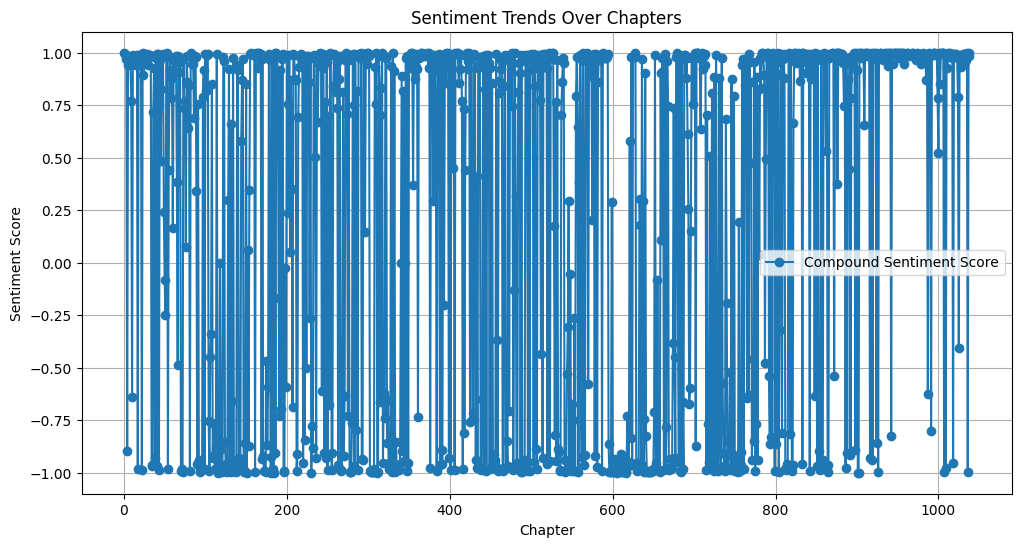

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(sentiment_df['compound'], label='Compound Sentiment Score', marker='o')
plt.xlabel('Chapter')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Trends Over Chapters')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
sentiment_df['smoothed'] = sentiment_df['compound'].rolling(window=10).mean()

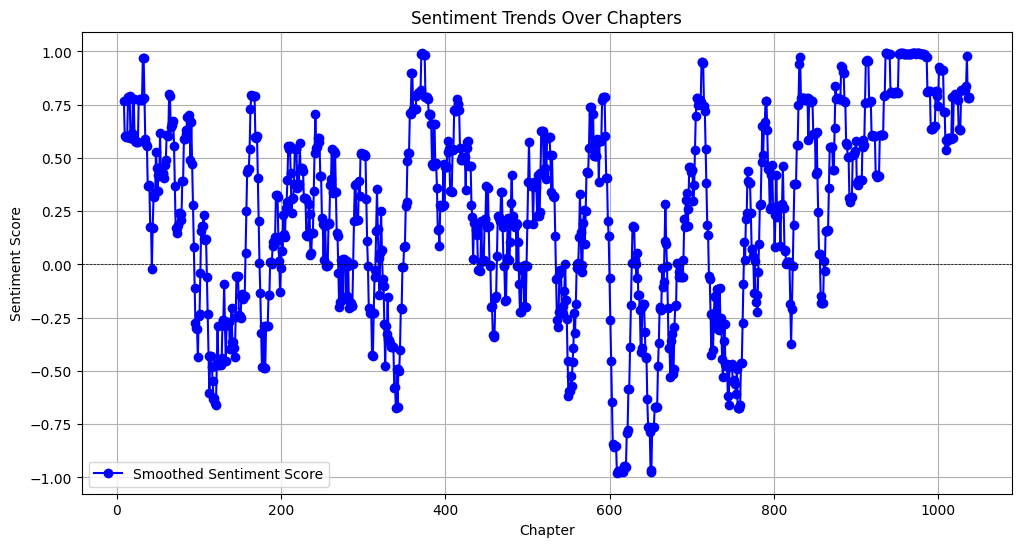

In [76]:
# Plot sentiment trends
plt.figure(figsize=(12, 6))
plt.plot(sentiment_df['smoothed'], label='Smoothed Sentiment Score', marker='o', color='b')
plt.xlabel('Chapter')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Trends Over Chapters')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid(True)
# Annotate specific chapters (customize chapter numbers)
plt.annotate('Chapter 5: Positive', xy=(5, sentiment_df['smoothed'][5]), xytext=(10, 0.5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='g'))

plt.show()